In [10]:
import cdflib
cdf_file = cdflib.CDF('ak_h1_mca_19890101_v02.cdf')

In [3]:
cdf_file.cdf_info()

{'CDF': PosixPath('/Document/git-test/ak_h1_mca_19890101_v02.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Emax', 'Eave', 'Bmax', 'Bave', 'PostGap', 'Epoch', 'channel'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resolution': 'Global'},
  {'TITLE': 'Global'},
  {'Start_time': 'Global'},
  {'End_time': 'Global'},
  {'AVG_TYPE': 'Variable'},
  {'CATDESC': 'Variable'}

In [4]:
cdf_file.varget('channel')

array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
       1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
       3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32)

In [5]:
cdf_file.varget("Eave",startrec=0,endrec=0)

array([[254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254]], dtype=uint8)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
xx = cdf_file.varget('Eave')

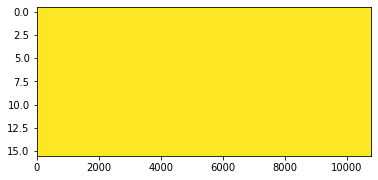

In [9]:
plt.imshow(xx.T, aspect=300)